In [22]:
import os
import csv
import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display
from scipy.io import wavfile

In [2]:
transcription = "a"
base_folder = "all_spanish_letters_recordings/aphasia_wav"
file_name = "aphasia/24418.mp4"

In [3]:
wav_filename = file_name.replace(".mp4", ".wav")
snd = parselmouth.Sound(os.path.join(base_folder, wav_filename))

4


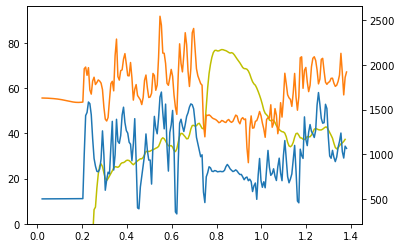

In [4]:
def extract_f1_f2_and_intensity_from_sound(snd):
    formants = snd.to_formant_burg()
    intensity = snd.to_intensity()
    f1 = list()
    f2 = list()
    intensity_list = list()
    for t in formants.t_grid():
        f1.append(formants.get_value_at_time(1,t))
        f2.append(formants.get_value_at_time(2,t))
        intensity_list.append(intensity.get_value(t))
    
    return f1, f2, intensity_list, formants.t_grid()

def plot_formants_and_intensity(f1, f2, intensity, t):
    plt.plot(t, intensity, color='y')
    plt.ylim(0)
    plt.grid(False)
    plt.twinx()
    plt.plot(t, f1)
    plt.plot(t, f2)
    
    
    
print(len(extract_f1_f2_and_intensity_from_sound(snd)))
    
plot_formants_and_intensity(*extract_f1_f2_and_intensity_from_sound(snd))

In [5]:
theoretical_formants = {
    "a": (650, 1300),
    "e": (450, 1800),
    "i": (300, 2200),
    "o": (450, 1000),
    "u": (300, 1000),
}

In [6]:
intensity_threshold = 50

In [7]:
for f1, f2, intensity, t in zip(*extract_f1_f2_and_intensity_from_sound(snd)):
    if intensity > intensity_threshold:
        print(f1, f2, intensity, t)

750.9846463064985 1439.4267524572717 51.785800214990616 0.7539999999999998
796.1279962130552 1433.8701634482118 60.135896843218376 0.7602499999999998
863.086414645604 1440.9143619326635 66.4280253331688 0.7664999999999998
851.1910776781233 1429.301235682904 70.49819634691785 0.7727499999999998
813.8238912829572 1411.2736074187742 73.55858284231353 0.7789999999999998
809.294180076006 1399.5766911075684 75.6219137145371 0.7852499999999998
820.8488612179142 1394.0327977174836 76.57356250750013 0.7914999999999998
816.5740294929205 1385.4722011937558 76.65555172716819 0.7977499999999998
806.7209219978154 1371.5380937846328 76.36548687980847 0.8039999999999998
809.2229677287548 1353.6637311232807 76.4077201806472 0.8102499999999998
811.8735110819092 1360.5020306476129 76.73668339333659 0.8164999999999998
808.7213437446495 1378.404366186884 76.97470874303245 0.8227499999999998
809.3711851212724 1372.717426332764 76.9063303989506 0.8289999999999998
823.5892495960043 1361.0786573894698 76.66814

In [8]:
def get_closer_vowel(f1,f2, theoretical_formants=theoretical_formants):
    return min(
        map(
            lambda x: 
                (x[0], abs(x[1] - f1) + abs(x[2] - f2)),
            ((vowel, t_f1, t_f2) for vowel, (t_f1, t_f2) in theoretical_formants.items())
        ),
        key=lambda x: x[1]
    )
    
get_closer_vowel(267.6835968566722,1389.4473284288606)

('u', 421.7637315721884)

In [9]:
for f1, f2, intensity, t in zip(*extract_f1_f2_and_intensity_from_sound(snd)):
    if intensity > intensity_threshold:
        print(t, get_closer_vowel(f1, f2))

0.7539999999999998 ('a', 240.4113987637702)
0.7602499999999998 ('a', 279.998159661267)
0.7664999999999998 ('a', 354.0007765782675)
0.7727499999999998 ('a', 330.4923133610273)
0.7789999999999998 ('a', 275.0974987017314)
0.7852499999999998 ('a', 258.8708711835744)
0.7914999999999998 ('a', 264.8816589353978)
0.7977499999999998 ('a', 252.04623068667638)
0.8039999999999998 ('a', 228.25901578244816)
0.8102499999999998 ('a', 212.88669885203558)
0.8164999999999998 ('a', 222.37554172952207)
0.8227499999999998 ('a', 237.1257099315336)
0.8289999999999998 ('a', 232.08861145403648)
0.8352499999999998 ('a', 234.66790698547402)
0.8414999999999998 ('a', 270.1337310710742)
0.8477499999999998 ('a', 317.9323976757555)
0.8539999999999998 ('a', 307.13092528553284)
0.8602499999999998 ('a', 257.8672765772543)
0.8664999999999998 ('a', 231.40114109149158)
0.8727499999999998 ('a', 228.79901304179373)
0.8789999999999998 ('a', 271.04002109843873)
0.8852499999999998 ('a', 316.95949174464556)
0.8914999999999998 ('a

In [10]:
abs(-5)

5

In [12]:
min

<function min>

In [14]:
file_name = "all_spanish_letters_recordings/aphasia_letters.txt"
with open(file_name) as f:
    all_recordings = f.readlines()
all_recordings

['aphasia/24410.mp4,a\n',
 'aphasia/24418.mp4,a\n',
 'aphasia/24689.mp4,a\n',
 'aphasia/24740.mp4,a\n',
 'aphasia/25130.mp4,a\n',
 'aphasia/25144.mp4,a\n',
 'aphasia/25475.mp4,a\n',
 'aphasia/26352.mp4,a\n',
 'aphasia/26400.mp4,a\n',
 'aphasia/26597.mp4,a\n',
 'aphasia/26604.mp4,a\n',
 'aphasia/32053.mp4,a\n',
 'aphasia/36558.mp4,a\n',
 'aphasia/24416.mp4,be\n',
 'aphasia/24690.mp4,be\n',
 'aphasia/24741.mp4,be\n',
 'aphasia/25131.mp4,be\n',
 'aphasia/25145.mp4,be\n',
 'aphasia/25476.mp4,be\n',
 'aphasia/26353.mp4,be\n',
 'aphasia/26401.mp4,be\n',
 'aphasia/26598.mp4,be\n',
 'aphasia/32054.mp4,be\n',
 'aphasia/36559.mp4,be\n',
 'aphasia/24417.mp4,ce\n',
 'aphasia/24691.mp4,ce\n',
 'aphasia/24742.mp4,ce\n',
 'aphasia/25132.mp4,ce\n',
 'aphasia/25146.mp4,ce\n',
 'aphasia/25477.mp4,ce\n',
 'aphasia/26354.mp4,ce\n',
 'aphasia/26402.mp4,ce\n',
 'aphasia/26599.mp4,ce\n',
 'aphasia/32055.mp4,ce\n',
 'aphasia/36560.mp4,ce\n',
 'aphasia/24420.mp4,de\n',
 'aphasia/24692.mp4,de\n',
 'aphasia/2471

In [29]:
formants_dir = "all_formants"
os.makedirs(formants_dir, exist_ok=True)

In [33]:
for record in all_recordings:
    record_name, transcription = record.replace("mp4", "wav").replace("\n", "").split(",")
    record_path = os.path.join(base_folder, record_name)
    transcription_file_path = os.path.join(formants_dir, f"{record_name.replace('.wav', '').split('/')[-1]}-{transcription}.csv")
    if os.path.exists(record_path):
        snd = parselmouth.Sound(record_path)
        field_names = ["t", "f1", "f2", "i", "vowel", "distance"]
                                           
        with open(transcription_file_path, "w+") as tf:
            writer = csv.DictWriter(tf, field_names, dialect='unix')
            writer.writeheader()
            for f1, f2, intensity, t in zip(*extract_f1_f2_and_intensity_from_sound(snd)):
                if intensity > intensity_threshold:
                    vowel, distance = get_closer_vowel(f1, f2)
                    writer.writerow({
                        "t": t,
                        "f1": f1,
                        "f2": f2,
                        "i": intensity,
                        "vowel": vowel,
                        "distance": distance
                    })
                                           
                                           
    else:
        print(f"Record file {record_path} does not exists")
    print(record_name, transcription)

Record file all_spanish_letters_recordings/aphasia_wav/aphasia/24410.wav does not exists
aphasia/24410.wav a
aphasia/24418.wav a
aphasia/24689.wav a
aphasia/24740.wav a
aphasia/25130.wav a
aphasia/25144.wav a
aphasia/25475.wav a
aphasia/26352.wav a
aphasia/26400.wav a
aphasia/26597.wav a
aphasia/26604.wav a
aphasia/32053.wav a
aphasia/36558.wav a
aphasia/24416.wav be
aphasia/24690.wav be
aphasia/24741.wav be
aphasia/25131.wav be
aphasia/25145.wav be
aphasia/25476.wav be
aphasia/26353.wav be
aphasia/26401.wav be
aphasia/26598.wav be
aphasia/32054.wav be
aphasia/36559.wav be
aphasia/24417.wav ce
aphasia/24691.wav ce
aphasia/24742.wav ce
aphasia/25132.wav ce
aphasia/25146.wav ce
aphasia/25477.wav ce
aphasia/26354.wav ce
aphasia/26402.wav ce
aphasia/26599.wav ce
aphasia/32055.wav ce
aphasia/36560.wav ce
aphasia/24420.wav de
aphasia/24692.wav de
aphasia/24717.wav de
aphasia/24743.wav de
aphasia/25147.wav de
aphasia/25478.wav de
aphasia/26355.wav de
aphasia/26403.wav de
aphasia/26600.wav de
